In [1]:
# import all modules

import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import L2
from sklearn.metrics import classification_report, accuracy_score

2025-02-21 10:41:59.125503: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
class FootprintProcessor:
    """ This Class handles footprint image processing """

    def __init__(self, grayscale=False, normalize=False, canny=False, gabor=False, ksize=5, sigma=0.1, theta=np.pi/4, lambd=10, gamma=0.5, psi=0, ktype=cv2.CV_32F, plotSamples=False):
        """ Initialize the FootprintProcessor

        Param:
            grayscale (bool, optional): Whether to convert the image to grayscale. Defaults to False.
            canny (bool, optional): Whether to apply Canny edge detection. Defaults to False.
            gabor (bool, optional): Whether to apply Gabor filter. Defaults to False.
            ksize (int, optional): Kernel size for Gabor filter. Defaults to 5.
            sigma (float, optional): Sigma value for Gabor filter. Defaults to 0.1.
            theta (float, optional): Theta value for Gabor filter. Defaults to np.pi/4.
            lambd (int, optional): Lambda value for Gabor filter. Defaults to 10.
            gamma (float, optional): Gamma value for Gabor filter. Defaults to 0.5.
            psi (float, optional): Psi value for Gabor filter. Defaults to 0.
            ktype (int, optional): Type of kernel for Gabor filter. Defaults to cv2.CV_32F.
        """

        self.grayscale = grayscale
        self.normalize = normalize
        self.canny = canny
        self.gabor = gabor
        self.ksize = ksize
        self.sigma = sigma
        self.theta = theta
        self.lambd = lambd
        self.gamma = gamma
        self.psi = psi
        self.ktype = ktype
        self.plotSamples = plotSamples

    def apply_grayscale(self, image):
        """ Convert the image to grayscale

        Param:
            image (numpy.ndarray): The input image.

        Returns:
            numpy.ndarray: The grayscale image.
        """
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    def apply_normalize(self, image):
        """ Normalize the image by dividing by 255.0

        Param:
            image (numpy.ndarray): The input image.

        Returns:
            numpy.ndarray: The normalized image.
        """
        return image / 255.0

    def apply_canny(self, image):
        """ Apply Canny edge detection

        Param:
            image (numpy.ndarray): The input image.

        Returns:
            numpy.ndarray: The Canny edge image.
        """
        image = image.astype(np.uint8)
        return cv2.Canny(image, 100, 200)

    def apply_gabor(self, image):
        """ Apply Gabor filter

        Param:
            image (numpy.ndarray): The input image.

        Returns:
            numpy.ndarray: The Gabor filtered image.
        """
        kernel = cv2.getGaborKernel((self.ksize, self.ksize), self.sigma, self.theta, self.lambd, self.gamma, self.psi, self.ktype)
        return cv2.filter2D(image, cv2.CV_8U, kernel)

    def preprocess(self, image):
        """ Preprocess the image

        Param:
            image (numpy.ndarray): The input image.

        Returns:
            numpy.ndarray: The preprocessed image.
        """
        if self.grayscale:
            image = self.apply_grayscale(image)
        if self.normalize:
            image = self.apply_normalize(image)
        if self.canny:
            image = self.apply_canny(image)
        if self.gabor:
            image = self.apply_gabor(image)
        return image

    def process_dataset(self, dataset_path):
        """ Process the dataset

        Param:
            dataset_path (str): The path to the dataset.

        Returns:
            tuple: A tuple containing the processed images and labels.
        """

        try:
            data = np.load(dataset_path)
        except FileNotFoundError:
            print(f"Dataset not found at {dataset_path}")
            return None
        except Exception as e:
            print(f"Error loading dataset: {e}")
            return None

        if 'X' not in data or 'Y' not in data:
            print("Dataset does not contain 'X' or 'Y' keys")
            return None

        images, self.labels = data['X'], data['Y']

        if len(images) != len(self.labels):
            print("Number of images and labels do not match")
            return None

        self.processed_images = np.array([self.preprocess(image) for image in images])

        if self.plotSamples:
            self.plot_samples()

        return self.processed_images, self.labels

    def plot_samples(self):
        """ Plot 10 random samples from the dataset """
        fig, ax = plt.subplots(2, 5, figsize=(15, 10))
        for i in range(10):
            idx = np.random.randint(0, self.processed_images.shape[0])
            ax[i//5, i%5].imshow(self.processed_images[idx], cmap='gray')
            ax[i//5, i%5].set_title(self.labels[idx])
        plt.show()

In [6]:
# Load and Run data via the preprocessor

footprintPreprocessor = FootprintProcessor(grayscale=False, normalize=True, canny=False, gabor=False, plotSamples=False)
X, Y = footprintPreprocessor.process_dataset('class/train_data.npz')

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)
y = to_categorical(y)


In [12]:
# Load and Run data via the preprocessor

footprintPreprocessor = FootprintProcessor(grayscale=False, normalize=True, canny=False, gabor=False, plotSamples=False)
X, Y = footprintPreprocessor.process_dataset('new/train_data.npz')

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)
y = to_categorical(y)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.3095 - loss: 4.1798 - val_accuracy: 0.5431 - val_loss: 1.3458 - learning_rate: 0.0010
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.6087 - loss: 1.3187 - val_accuracy: 0.6497 - val_loss: 1.1345 - learning_rate: 0.0010
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.7684 - loss: 0.7521 - val_accuracy: 0.7310 - val_loss: 0.7869 - learning_rate: 0.0010
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8583 - loss: 0.4264 - val_accuracy: 0.7462 - val_loss: 0.9306 - learning_rate: 0.0010
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.8656 - loss: 0.4143 - val_accuracy: 0.7411 - val_loss: 0.8066 - learning_rate: 0.0010
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.8930 - loss: 0.2819 - val_accuracy: 0.7868 - val_loss: 0.5925 - learning_rate: 0.0010
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.9293 - loss: 0.2446 - val_accuracy: 

Text(0.5, 1.0, 'Training Performance')

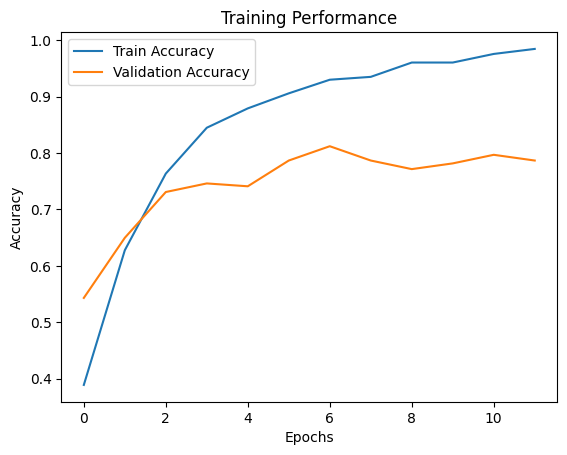

In [15]:
# use Xception pretrained model to build model

from tensorflow.keras.applications import Xception

base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    
    Dense(128, activation='relu'),
    Dropout(0.2),
    
    Dense(6, activation='softmax')
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train model and plot 

callbacks = [
    ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, verbose=1),
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)
]

history = model.fit(
    X_train, y_train, batch_size=32,
    validation_split=0.2,
    epochs=20,
    callbacks=callbacks
)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Performance")

In [16]:
model.save('model/footprintclassifier_v2.h5')
model.save('model/footprintclassifier_v2.keras')


## Shuffle Data and Build Model

In [ ]:
footprintPreprocessor = FootprintProcessor(grayscale=False, normalize=True, canny=False, gabor=False, plotSamples=False)
X, Y = footprintPreprocessor.process_dataset('new/train_data.npz')

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)
y = to_categorical(y)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 124s 5s/step - accuracy: 0.2868 - loss: 5.9631 - val_accuracy: 0.5381 - val_loss: 1.2840 - learning_rate: 0.0010
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 155s 6s/step - accuracy: 0.5682 - loss: 1.3120 - val_accuracy: 0.6193 - val_loss: 1.0173 - learning_rate: 0.0010
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 250s 10s/step - accuracy: 0.6903 - loss: 0.8891 - val_accuracy: 0.6853 - val_loss: 0.8848 - learning_rate: 0.0010
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 173s 7s/step - accuracy: 0.8081 - loss: 0.5445 - val_accuracy: 0.7716 - val_loss: 0.7600 - learning_rate: 0.0010
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.8393 - loss: 0.4477 - val_accuracy: 0.7513 - val_loss: 0.7838 - learning_rate: 0.0010
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - accuracy: 0.8790 - loss: 0.3627 - val_accuracy: 0.7259 - val_loss: 0.9384 - learning_rate: 0.0010
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8952 - loss: 0.2902
Epoch 7: R

Text(0.5, 1.0, 'Training Performance')

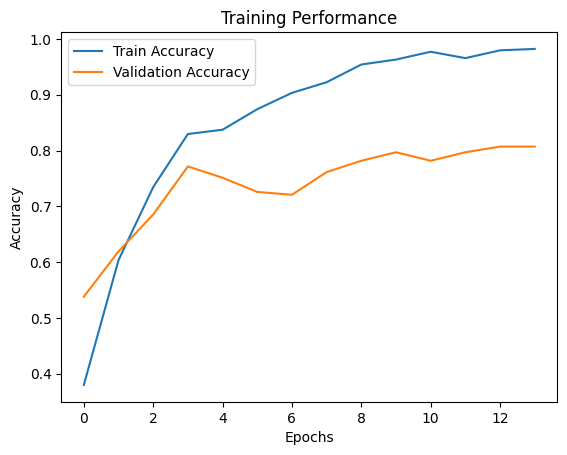

In [ ]:
# use Xception pretrained model to build model

from tensorflow.keras.applications import Xception

base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    
    Dense(128, activation='relu'),
    Dropout(0.2),
    
    Dense(6, activation='softmax')
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

callbacks = [
    ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, verbose=1),
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)
]

history = model.fit(
    X_train, y_train, batch_size=32,
    validation_split=0.2,
    epochs=20,
    callbacks=callbacks
)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Performance")

### Classification Result

In [24]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.81      0.74      0.77        34
           2       0.70      0.70      0.70        37
           3       0.78      0.84      0.81        55
           4       0.86      0.91      0.88        46
           5       0.91      0.84      0.88        51

    accuracy                           0.83       246
   macro avg       0.84      0.83      0.83       246
weighted avg       0.83      0.83      0.83       246

0.8292682926829268


### Confusion Matrix

Text(50.722222222222214, 0.5, 'True')

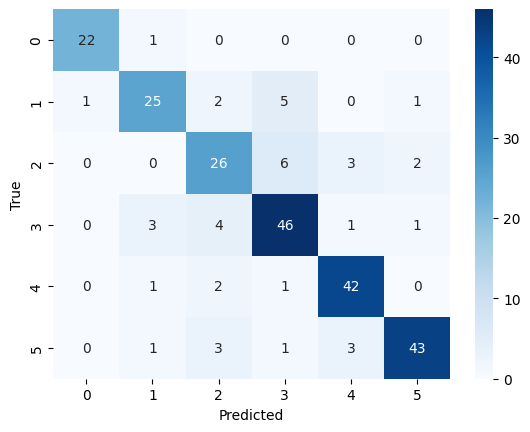

In [25]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

### Save Model as .h5 and .keraas

In [26]:
model.save('model/footprintclassifier_v2_shuffle.h5')
model.save('model/footprintclassifier_v2_shuffle.keras')
